### 20- Time Series -  Time Series Forecasting with Prophet Package

In [3]:
#pip install yfinance

In [4]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()


In [5]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2024-06-14  175.852005  178.729996  175.852005  178.369995  178.369995   
247 2024-06-17  176.979996  179.919998  176.490005  178.779999  178.779999   
248 2024-06-18  178.789993  178.910004  175.619995  176.449997  176.449997   
249 2024-06-20  176.710007  178.740005  176.460007  177.710007  177.710007   
250 2024-06-21  178.490005  182.511993  178.059998  180.259995  180.259995   

       Volume  
246  12361600  
247  15272900  
248  15640300  
249  16753200  
250  58903200  


In [6]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2023-06-23  123.019997
1 2023-06-26  119.089996
2 2023-06-27  119.010002
3 2023-06-28  121.080002
4 2023-06-29  120.010002


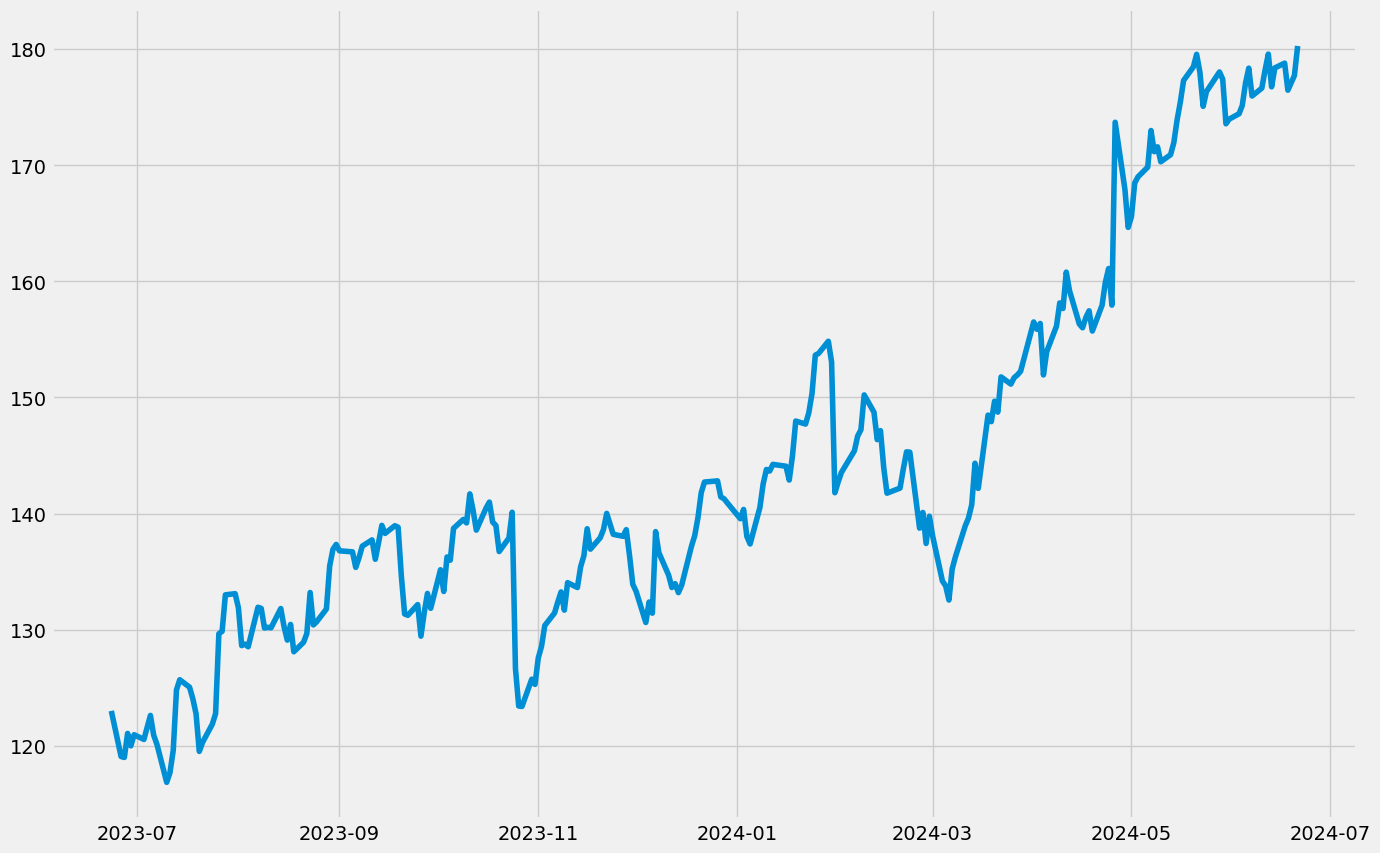

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose


<Figure size 640x480 with 0 Axes>

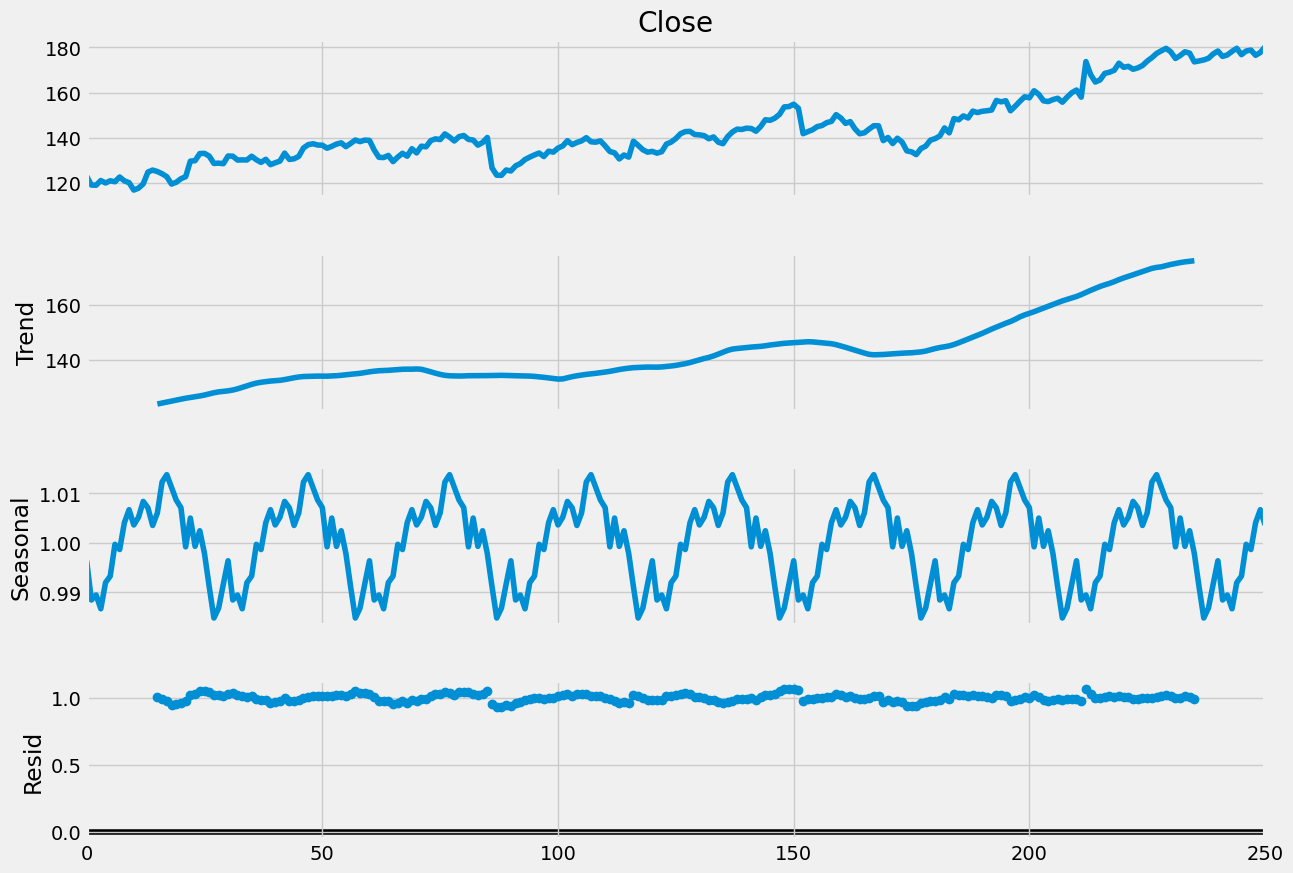

In [9]:
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

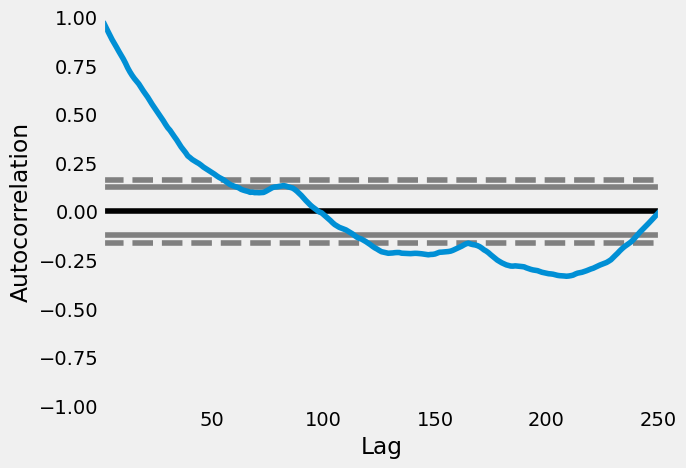

In [10]:
pd.plotting.autocorrelation_plot(data["Close"])

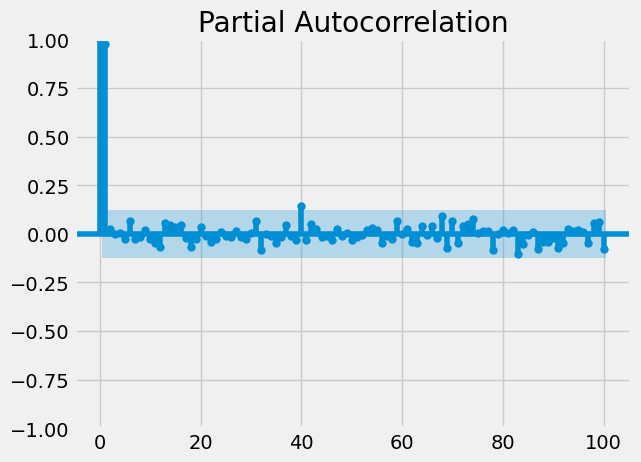

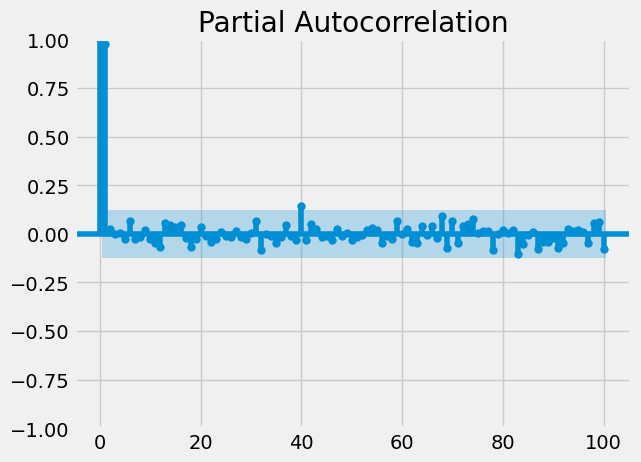

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [14]:
data['Date'] = pd.to_datetime(data['Date'])


In [17]:
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})


In [18]:
from prophet import Prophet
pr=Prophet()

In [19]:
model=pr.fit(data)

18:38:52 - cmdstanpy - INFO - Chain [1] start processing
18:38:52 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future = model.make_future_dataframe(periods=365)  # for 1 year into the future


In [21]:
forecast = model.predict(future)


C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


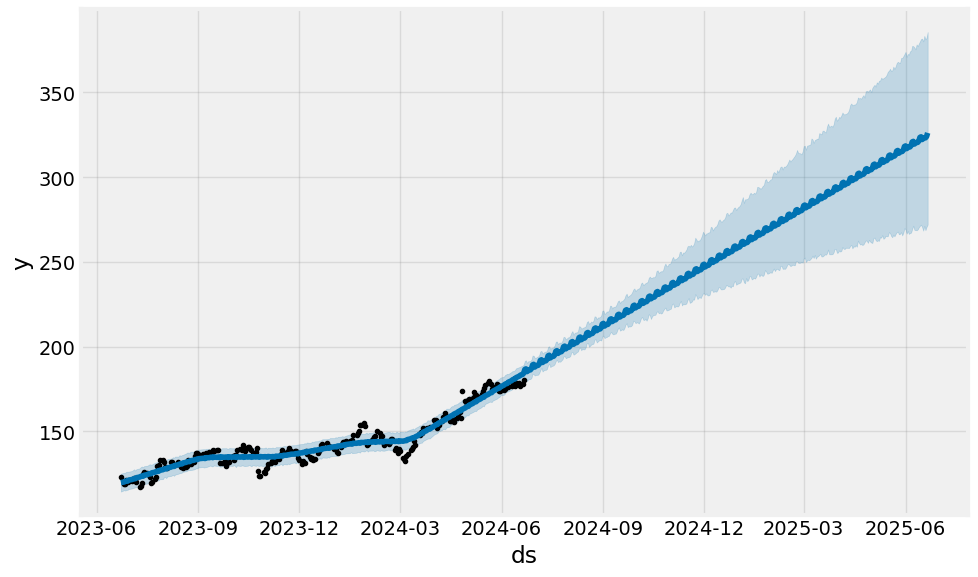

In [22]:
fig = model.plot(forecast)
plt.show()

In [23]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
611,2025-06-17,322.805773,268.425143,380.151276
612,2025-06-18,323.117230,271.303157,383.441362
613,2025-06-19,323.228850,268.695769,381.367925
614,2025-06-20,324.015990,270.646963,382.294538
615,2025-06-21,326.152791,272.013903,385.724441


C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


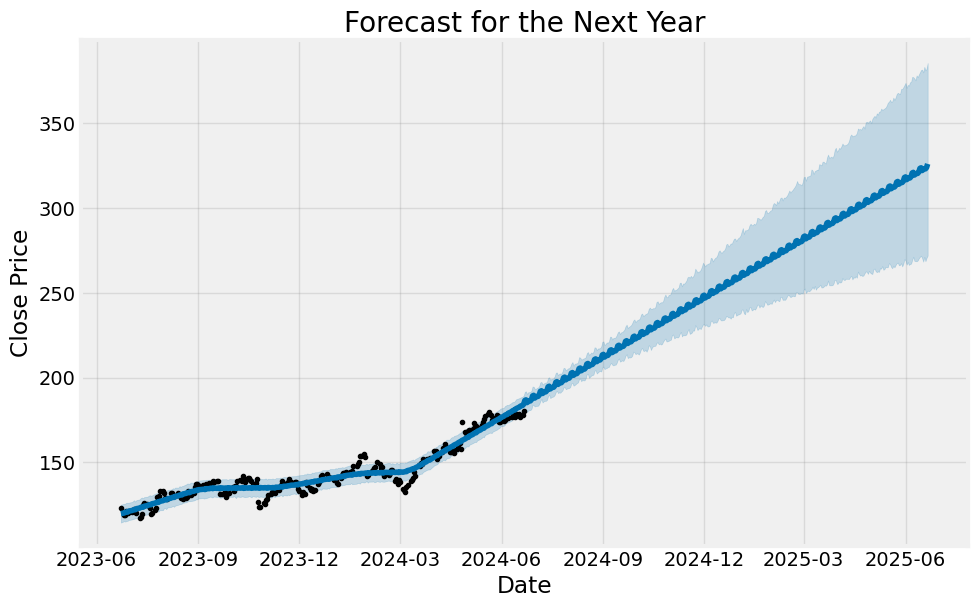

In [24]:
# Step 6: Plot the forecast
fig1 = model.plot(forecast)
plt.title('Forecast for the Next Year')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


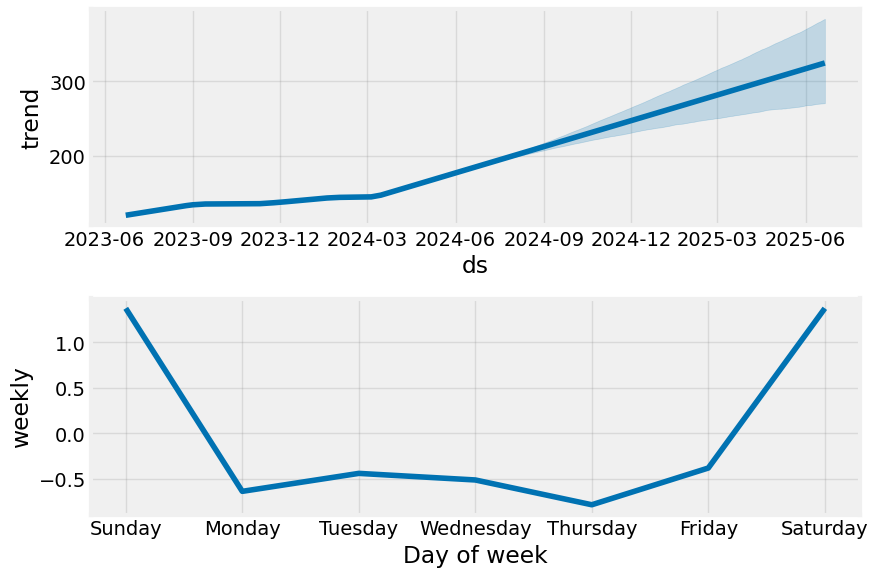

In [25]:
# Step 7: Plot forecast components
fig2 = model.plot_components(forecast)
plt.show()


In [ ]:
.